In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install folium
import folium

In [3]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
df.sort_values('Very interested', ascending=False, inplace=True)
df = ((df/2233)*100).round(2)

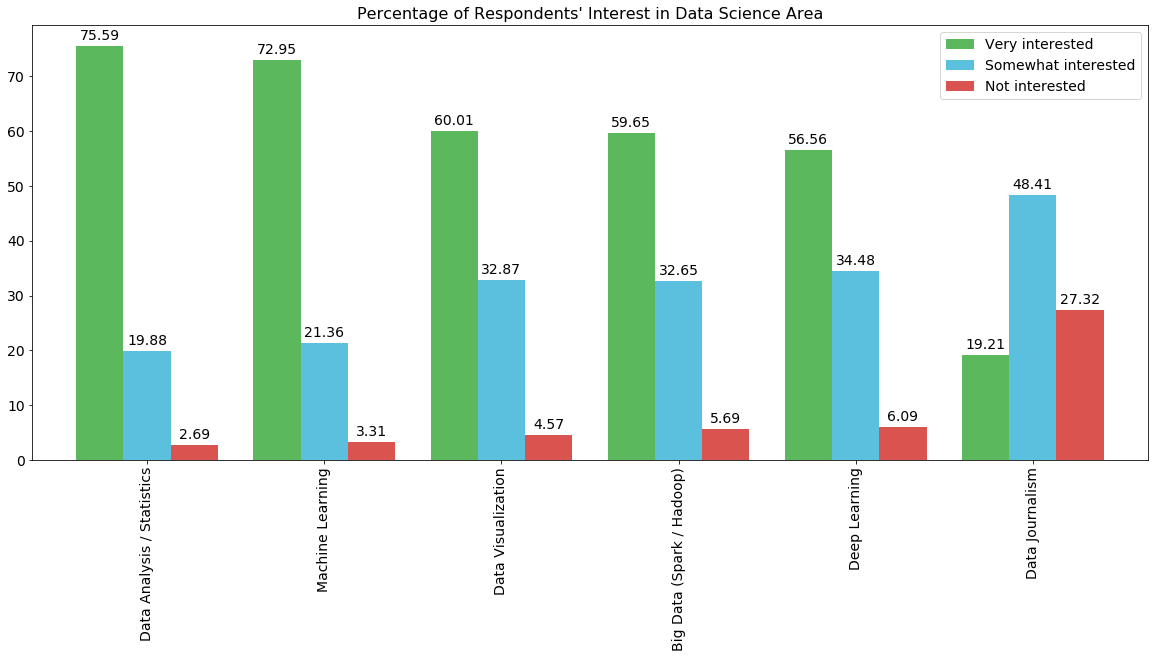

In [6]:
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2.0, p.get_height()),
                ha='center', va='center',  
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

In [7]:
df2 = pd.read_csv('https://cocl.us/sanfran_crime_dataset', index_col=0)
df2.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [8]:
df3 = df2["PdDistrict"].value_counts().to_frame()
desired_index = ["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"]
df3=df3.reindex(desired_index).reset_index()
df3.rename(columns={"index": "Neighborhood", "PdDistrict": "Count"}, inplace=True)

In [10]:
df3

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [11]:
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

sf_map.choropleth(
    geo_data='https://cocl.us/sanfran_geojson',
    data=df3,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map